In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df=pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender',
'reside']] .values#.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [4]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [8]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [9]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [10]:
from sklearn.neighbors import KNeighborsClassifier
k = 6
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [11]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 3, 3, 4, 4])

In [12]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


K=4 is more accurate because the train set accuracy is higher in K=4 than that of K=6.

In [13]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
#Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

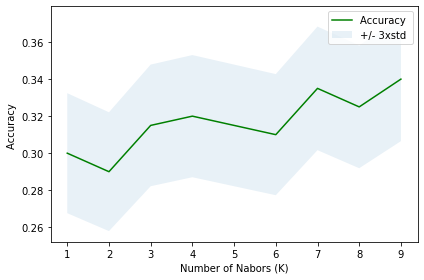

In [14]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Based on the graph, when the value of k is 9, it is more accurate. The accuracy is 0.34 when the value of k is 9.

In [15]:
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
wine_tr = pd.read_csv("wine_flag_training.csv")
wine_test = pd.read_csv("wine_flag_test.csv")

In [16]:
t1 = pd.crosstab(wine_tr['Type'], wine_tr['Alcohol_flag'])
t1['Total']= t1.sum(axis=1)
t1.loc['Total'] = t1.sum()
t1

Alcohol_flag,High,Low,Total
Type,,,
Red,218,282,500
White,268,232,500
Total,486,514,1000


In [17]:
t2 = pd.crosstab(wine_test['Type'], wine_test['Sugar_flag'])
t2['Total']= t2.sum(axis=1)
t2.loc['Total'] = t2.sum()
t2

Sugar_flag,High,Low,Total
Type,,,
Red,121,464,585
White,1082,678,1760
Total,1203,1142,2345


The probability that the alcohol flag is high is 486/1000 i.e 0.486.

The probability that the alcohol is high, given that the type is red is 218/500 i.e 0.436.

The probability that the sugar is low, given that the type is white is 678/1760 i.e 0.385.

<AxesSubplot:xlabel='Alcohol_flag'>

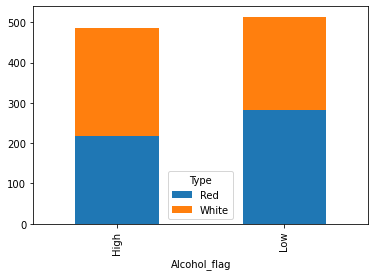

In [18]:
t2_plot=pd.crosstab(wine_tr['Alcohol_flag'],wine_tr['Type'])
t2_plot.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Sugar_flag'>

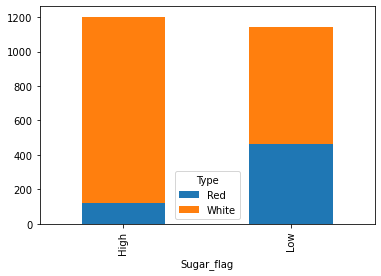

In [19]:
t2_plot=pd.crosstab(wine_test['Sugar_flag'],wine_test['Type'])
t2_plot.plot(kind='bar', stacked = True)

From the above figure we can say that the red wine has less alcohol and sugar level.

In [20]:
X_Alcohol_ind = np.array(wine_tr['Alcohol_flag'])
(X_Alcohol_ind, X_Alcohol_ind_dict)= stattools.categorical(X_Alcohol_ind, drop = True,
dictnames = True)
X_Alcohol_ind = pd.DataFrame(X_Alcohol_ind)
X_Sugar_ind = np.array(wine_tr['Sugar_flag'])
(X_Sugar_ind, X_Sugar_ind_dict)= stattools.categorical(X_Sugar_ind, drop = True,
dictnames = True)
X_Sugar_ind = pd.DataFrame(X_Sugar_ind)
X = pd.concat((X_Alcohol_ind, X_Sugar_ind), axis = 1)
X.head()

/Users/phantom/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


,0,1,0,1
0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0


In [21]:
Y = wine_tr['Type']
nb_01 = MultinomialNB().fit(X,Y)

In [22]:
X_Alcohol_ind_test = np.array(wine_test['Alcohol_flag'])
(X_Alcohol_ind_test, X_Alcohol_ind_dict_test)= stattools.categorical(X_Alcohol_ind_test,
drop = True, dictnames = True)
X_Alcohol_ind_test = pd.DataFrame(X_Alcohol_ind_test)
X_Sugar_ind_test = np.array(wine_test['Sugar_flag'])
(X_Sugar_ind_test, X_Sugar_ind_dict_test)= stattools.categorical(X_Sugar_ind_test, drop
= True, dictnames = True)
X_Sugar_ind_test = pd.DataFrame(X_Sugar_ind_test)
X_test = pd.concat((X_Alcohol_ind_test, X_Sugar_ind_test), axis = 1)
Y_Predicted = nb_01.predict(X_test)

/Users/phantom/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/tools.py:158: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


In [23]:
ypred = pd.crosstab(wine_test['Type'], Y_Predicted, rownames = ['Actual'], colnames =
['Predicted'])
ypred['Total']= ypred.sum(axis = 1)
ypred.loc['Total']=ypred.sum()
ypred

Predicted,Red,White,Total
Actual,,,
Red,464,121,585
White,678,1082,1760
Total,1142,1203,2345


464 wines were predicted red and actually red.

Of the actual red wines, 464/585*100=79.32 i.e 79.32% of them were predicted correctly.

Of the actual white wines, 678/1760*100=38.52 i.e. 38.52% of them were predicted incorrectly.

Out of all the wines, 464+1082=1546 i.e. 1546 were predicted correctly.

Out of all the wines, 1546/2345*100=65.93 i.e 65.93% of them were predicted correctly.